# Wine 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### 데이터 import

In [3]:
Wine = pd.read_csv('Wine_Data/winequality-white.csv',sep=";")

In [4]:
Wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred,average='macro')
    recall = recall_score(y_test,pred,average='macro')
    f1 = f1_score(y_test,pred,average='weighted')
    roc = roc_auc_score(y_test, pred_proba,multi_class='ovr')
    
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, f1 : {f1:.4f}, roc : {roc:.4f}')

In [6]:
scaler = StandardScaler()
wine_scaler = scaler.fit_transform(Wine)

In [7]:
wine_scaler

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

In [9]:
X=Wine.iloc[:,:-1]
y=Wine.iloc[:,-1]
X_scaler = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
   X_scaler,y,test_size=0.2,stratify=y,
    random_state = 156)

lr_clf = LogisticRegression(random_state=156)
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)


get_clf_eval(y_test,pred,pred_proba)

오차행렬
[[  1   0   3   0   0   0   0]
 [  0   1  24   8   0   0   0]
 [  1   2 158 130   0   0   0]
 [  0   2  91 321  26   0   0]
 [  0   0   7 121  48   0   0]
 [  0   0   4  21  10   0   0]
 [  0   0   0   0   1   0   0]]
정확도 : 0.5398, 정밀도 : 0.3356, 재현율 : 0.2608, f1 : 0.5084, roc : 0.7818


C:\Users\inkwabusan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\inkwabusan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Heatmap

In [10]:
import seaborn as sns

In [14]:
heatmap_data = Wine[['fixed acidity','volatile acidity','citric acid',
'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH',
'sulphates','alcohol','quality']]

<AxesSubplot:>

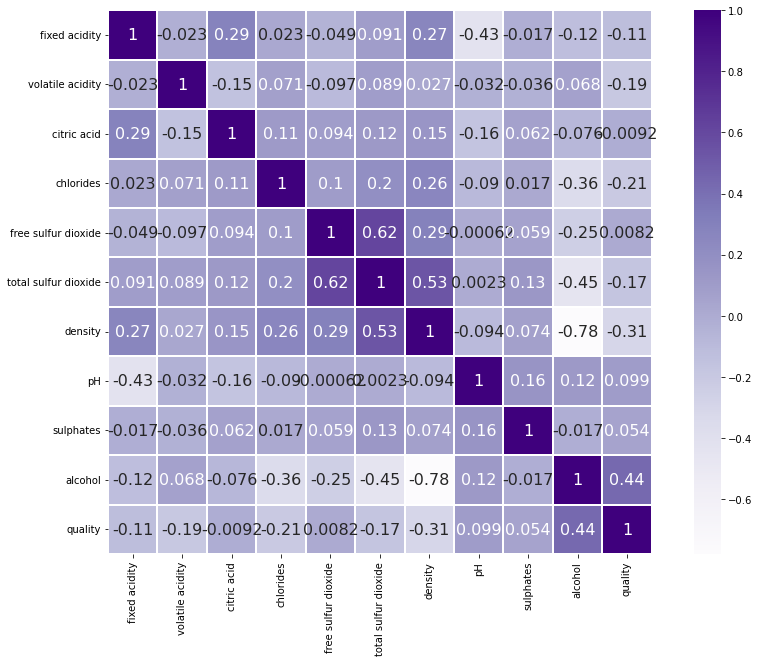

In [21]:
colormap = plt.cm.Purples
plt.figure(figsize=(15,10))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor="White", annot=True, annot_kws={"size" : 16})